In [1]:
#tuon tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pylväskaavoiden prosenttiakselien tuunausta varte
from matplotlib.ticker import PercentFormatter
#desimaalilukuja varten
myFmt1 = PercentFormatter (xmax=1, decimals=0, symbol=' %')
myFmt100 = PercentFormatter (xmax=100, decimals=0, symbol=' %')

In [2]:
df = pd.read_csv('http://taanila.fi/employee.csv')
df.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        

In [3]:
df.rename (columns = {},inplace=True)
df.head()

df.rename (columns = {'Age': 'Ikä', 'BusinessTravel':'Työmatkat','DistanceFromHome':'Työmatkan pituus','Education':'Koulutus','EducationField':'Tiedekunta','Attrition':'Poistuma','DailyRate':'Palkka','Department':'Osasto'},inplace=True)
df.head()

df.rename (columns = {'EmployeeCount':'Työntekijöiden lkm', 'EmployeeNumber':'Työntekijänumero','RelationshipSatisfaction':'Tyytyväisyys','StandardHours':'Työtunnit','StockOptionLevel':'Osakeoptiotaso','TotalWorkingYears':'Työvuodet','TrainingTimesLastYear':'Viime vuoden koulutukset','WorkLifeBalance':'Työn ja huvin tasapaino','YearsAtCompany':'Palvelusvuodet','YearsInCurrentRole':'Aika nykyisessä roolissa','YearsSinceLastPromotion':'Vuodet ylennyksestä','YearsWithCurrManager':'Aika nykyisen esimiehen kanssa'},inplace=True)
df.head()

df['Poistuma'] = df['Poistuma'].replace({'Yes' : 'Kyllä', 'No' : 'Ei'})
df.head()
df['Työmatkat'] = df['Työmatkat'].replace({'Travel_Rarely' : 'Harvoin', 'Travel_Frequently' : 'Usein'})
df.head()
df['Tiedekunta'] = df['Tiedekunta'].replace({'Life Sciences' : 'Biotieteet', 'Other' : 'Muu','Medical':'Lääketiede'})
df['Osasto'] = df['Osasto'].replace({'Sales':'Myynti','Research & Development':'Tutkimus ja kehittäminen'})
df.head()



,Ikä,Poistuma,Työmatkat,Palkka,Osasto,Työmatkan pituus,Koulutus,Tiedekunta,Työntekijöiden lkm,Työntekijänumero,...,Tyytyväisyys,Työtunnit,Osakeoptiotaso,Työvuodet,Viime vuoden koulutukset,Työn ja huvin tasapaino,Palvelusvuodet,Aika nykyisessä roolissa,Vuodet ylennyksestä,Aika nykyisen esimiehen kanssa
0,41,Kyllä,Harvoin,1102,Myynti,1,2,Biotieteet,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Ei,Usein,279,Tutkimus ja kehittäminen,8,1,Biotieteet,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Kyllä,Harvoin,1373,Tutkimus ja kehittäminen,2,2,Muu,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Ei,Usein,1392,Tutkimus ja kehittäminen,3,4,Biotieteet,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Ei,Harvoin,591,Tutkimus ja kehittäminen,2,1,Lääketiede,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
Koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu','Tohtori']
Osasto = ['Myynti', 'Tutkimus ja kehittäminen','Human Resources']

In [5]:

df1 = pd.crosstab(df['Koulutus'], 'n')

#korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = Koulutus

#poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

df1

,n
Peruskoulu,170
2. aste,282
Korkeakoulu,572
Ylempi korkeakoulu,398
Tohtori,48


In [6]:
#lisään prosentti-sarakkeen
df1['%'] = df1/df1.sum()*100

#muotoilen prosentit yhden desimaalin tarkkuuteen
df1.style.format({'%': '{:.1f} %'})

,n,%
Peruskoulu,170,11.6 %
2. aste,282,19.2 %
Korkeakoulu,572,38.9 %
Ylempi korkeakoulu,398,27.1 %
Tohtori,48,3.3 %


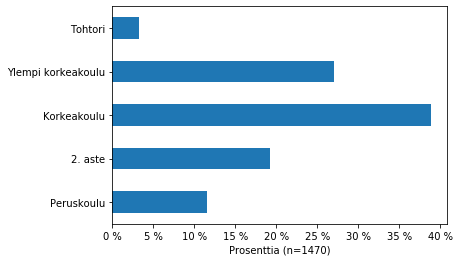

In [7]:
#vaakapylväskaavio prosenteista
ax1 = df1['%'].plot.barh()

#x-akselin otsikointi
n=df1['n'].sum()
ax1.set_xlabel('Prosenttia (n=' + str(n) + ')')

#x-akselin muokkaus
ax1.xaxis.set_major_formatter(myFmt100)

In [8]:
# Määrittelen luokkarajat iän luokittelemiseksi 
bins = [18, 24, 34, 44, 54, 64]

# Lisään dataan ikäluokka-sarakkeen
df['Ikäluokka'] = pd.cut(df['Ikä'], bins = bins)

# Ikäluokkiin kuuluvien lukumäärät
df1 = pd.crosstab(df['Ikäluokka'], 'lkm')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = df1/n*100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi
df1.index = df1.index.astype(str)
df1.loc['Yhteensä'] = df1.sum()

# Prosenttilukujen ulkoasun viimeistely
df1.style.format({'%': '{:.1f} %'})

,lkm,%
Ikäluokka,,
"(18, 24]",89,6.1 %
"(24, 34]",554,37.9 %
"(34, 44]",505,34.5 %
"(44, 54]",245,16.8 %
"(54, 64]",69,4.7 %
Yhteensä,1462,100.0 %


In [9]:
# Sama luokittelu palkalle
bins = [200, 400, 600, 800, 1000, 1200 , 1400, 1600, 1800, 2000]


df['Palkkaluokka'] = pd.cut(df['Palkka'], bins = bins)


df1 = pd.crosstab(df['Palkkaluokka'], 'lkm')


df1.columns.name = ''


n = df1['lkm'].sum()
df1['%'] = df1/n*100


df1.index = df1.index.astype(str)
df1.loc['Yhteensä'] = df1.sum()


df1.style.format({'%': '{:.1f} %'})

,lkm,%
Palkkaluokka,,
"(200, 400]",194,14.2 %
"(400, 600]",228,16.7 %
"(600, 800]",205,15.0 %
"(800, 1000]",214,15.7 %
"(1000, 1200]",201,14.7 %
"(1200, 1400]",228,16.7 %
"(1400, 1600]",94,6.9 %
Yhteensä,1364,100.0 %


Text(0, 0.5, 'lkm')

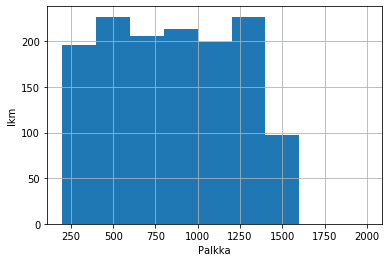

In [10]:
# Luokitellun jakauman tarkastelu hist-kaaviolla
ax2 = df['Palkka'].hist(bins=bins)
ax2.set_xlabel('Palkka')
ax2.set_ylabel('lkm')

In [11]:
# Ristiintaulukointi lukumäärinä
df1 = pd.crosstab(df['Koulutus'], df['Osasto'])

# Otsikot kuntoon
df1.index = Koulutus
df1.columns = Osasto

df1

,Myynti,Tutkimus ja kehittäminen,Human Resources
Peruskoulu,5,50,115
2. aste,13,87,182
Korkeakoulu,27,166,379
Ylempi korkeakoulu,15,128,255
Tohtori,3,15,30


Text(0.5, 0, 'Kpl osastosta')

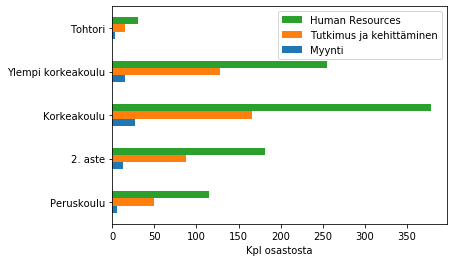

In [12]:
#edellinen pylväinä; legend='reverse' kääntää selitteen järjestyksen
ax2 = df1.plot.barh(legend='reverse')

ax2.set_xlabel('Kpl osastosta')